<a href="https://colab.research.google.com/github/matias-25/Control_Optimo_UNCa_FTyCA/blob/main/Trabajo_Pratico_3_Control_Optimo_UNCa_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Prático 3

### Problema N° 1:
Graficar las funciones de correlación PHIxx, PHIyy, PHIzz, PHIww de las siguientes señales
temporales;

 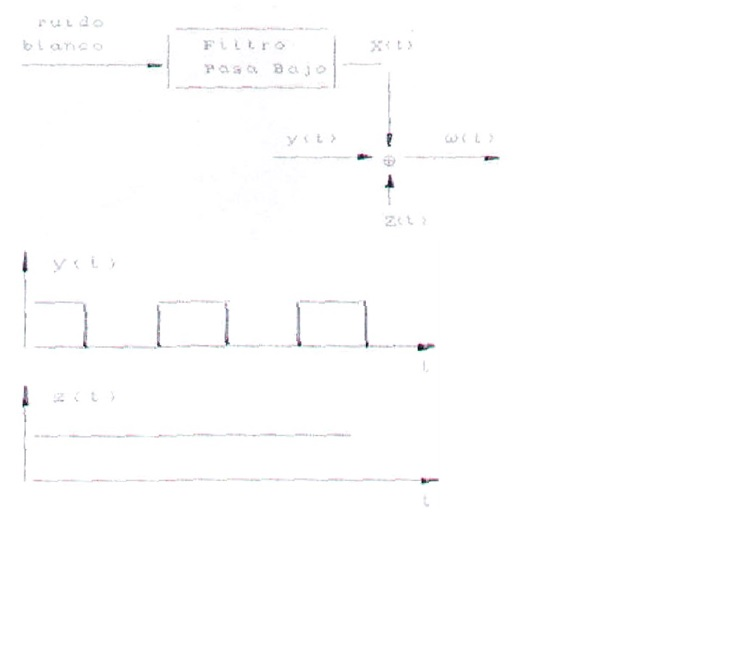


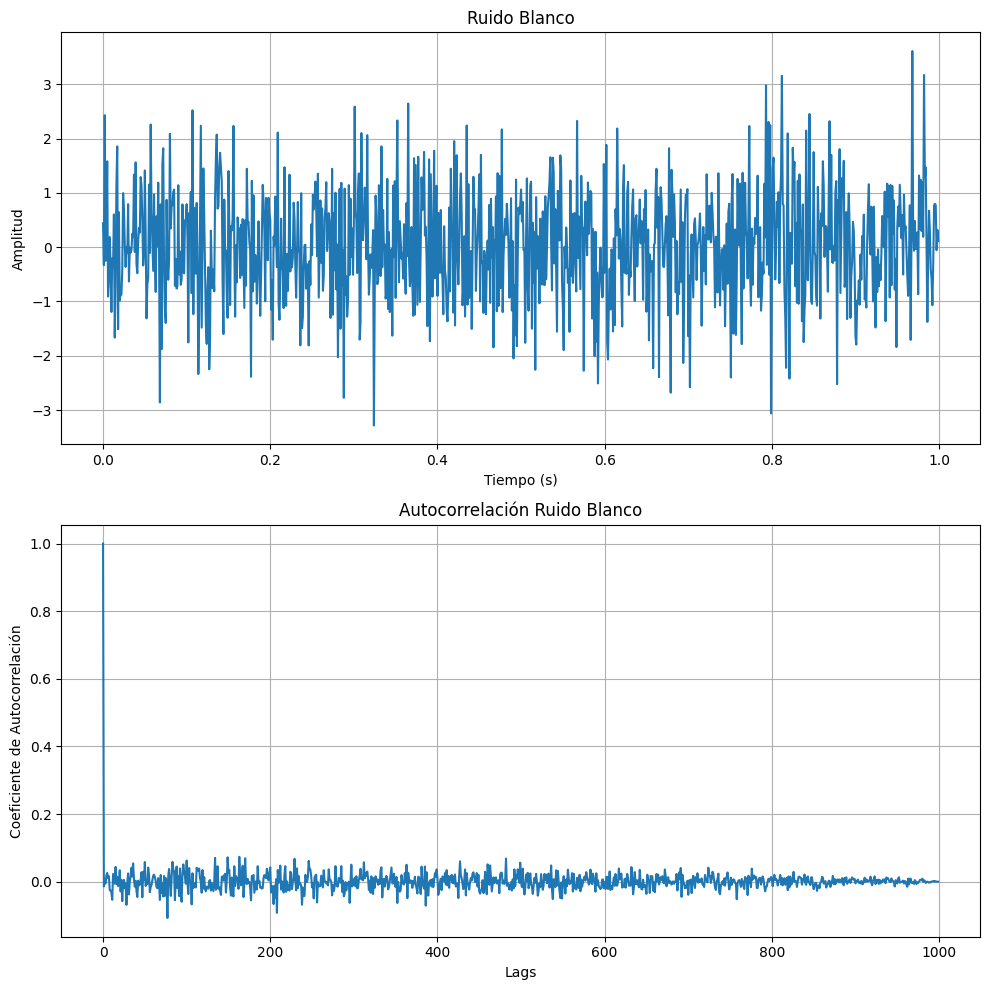

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000
t = np.arange(0, 1, 1/fs)  # Vector de tiempo [seg]
N= len(t)
np.random.seed(5)  # Para generar la misma señal aleatoria
signal = np.random.randn(len(t))

# Calcular la autocorrelación del ruido "blanco"
autocorr = np.correlate(signal, signal, mode='full')
autocorr = autocorr / np.max(autocorr)  # Normalizar
lags = np.arange(-len(signal) + 1, len(signal))

# Graficar la señal original y su autocorrelación
plt.figure(figsize=(10, 10))

# Subgráfico 1: Ruido Blanco
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Ruido Blanco')
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Subgráfico 2: Autocorrelación
plt.subplot(2, 1, 2)
plt.plot(lags[int(N-1):int(2*N)], autocorr[int(N-1):int(2*N)])
plt.title('Autocorrelación Ruido Blanco')
plt.grid()
plt.xlabel('Lags')
plt.ylabel('Coeficiente de Autocorrelación')

plt.tight_layout()
plt.show()

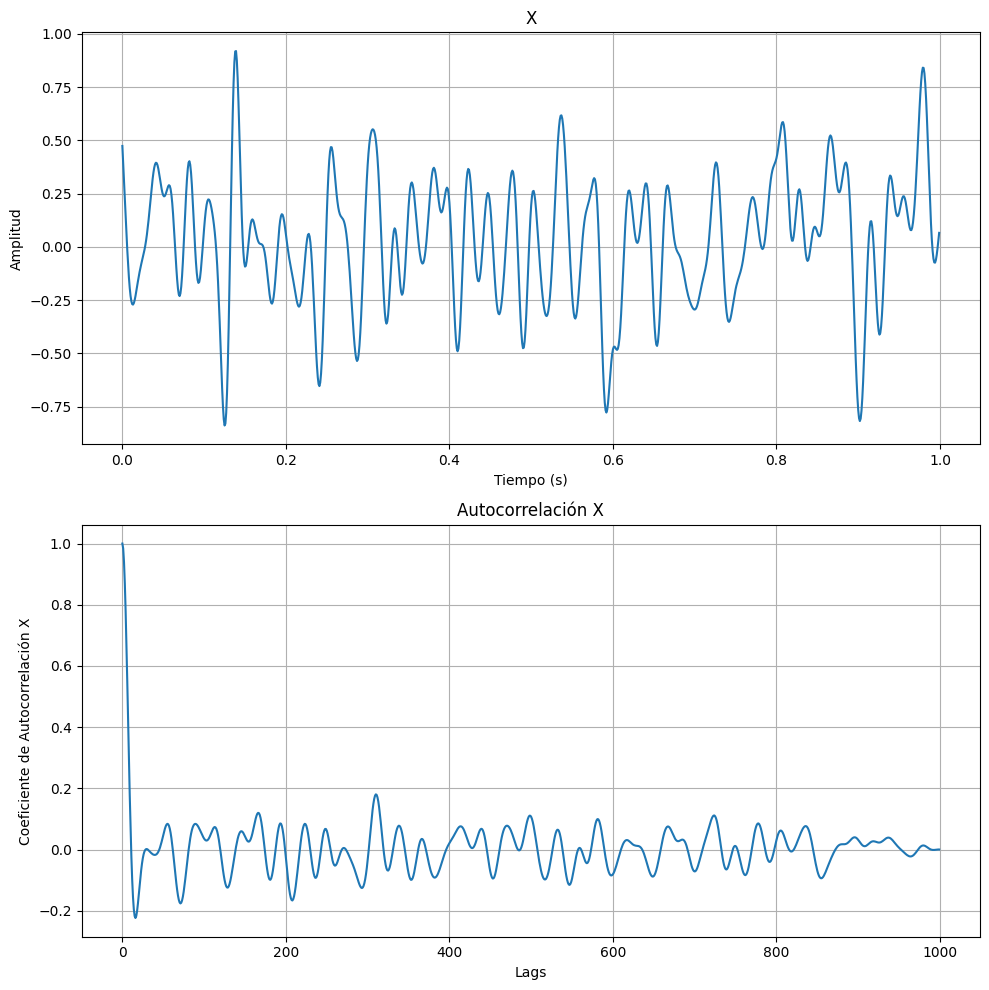

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Especificaciones del filtro
orden = 5  # Orden del filtro
frecuencia_corte = 10  # Frecuencia de corte en Hz
frecuencia_muestreo = fs  # Frecuencia de muestreo en Hz

# Diseño del filtro Butterworth
numerador, denominador = butter(orden, frecuencia_corte/(frecuencia_muestreo/10), btype='low')

# Señales X
X = filtfilt(numerador, denominador, signal)  # Señal filtrada X

# Autocorrelación
autocorr_X = np.correlate(X, X, mode='full')
autocorr_X /= np.max(autocorr_X)  # Normalizar
lags_X = np.arange(-len(X) + 1, len(X))

# Graficar la señal X y su autocorrelación
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(t, X)
plt.title('X')
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(lags_X[int(N-1):int(2*N)], autocorr_X[int(N-1):int(2*N)])
plt.title('Autocorrelación X')
plt.grid(True)
plt.xlabel('Lags')
plt.ylabel('Coeficiente de Autocorrelación X')

plt.tight_layout()
plt.show()

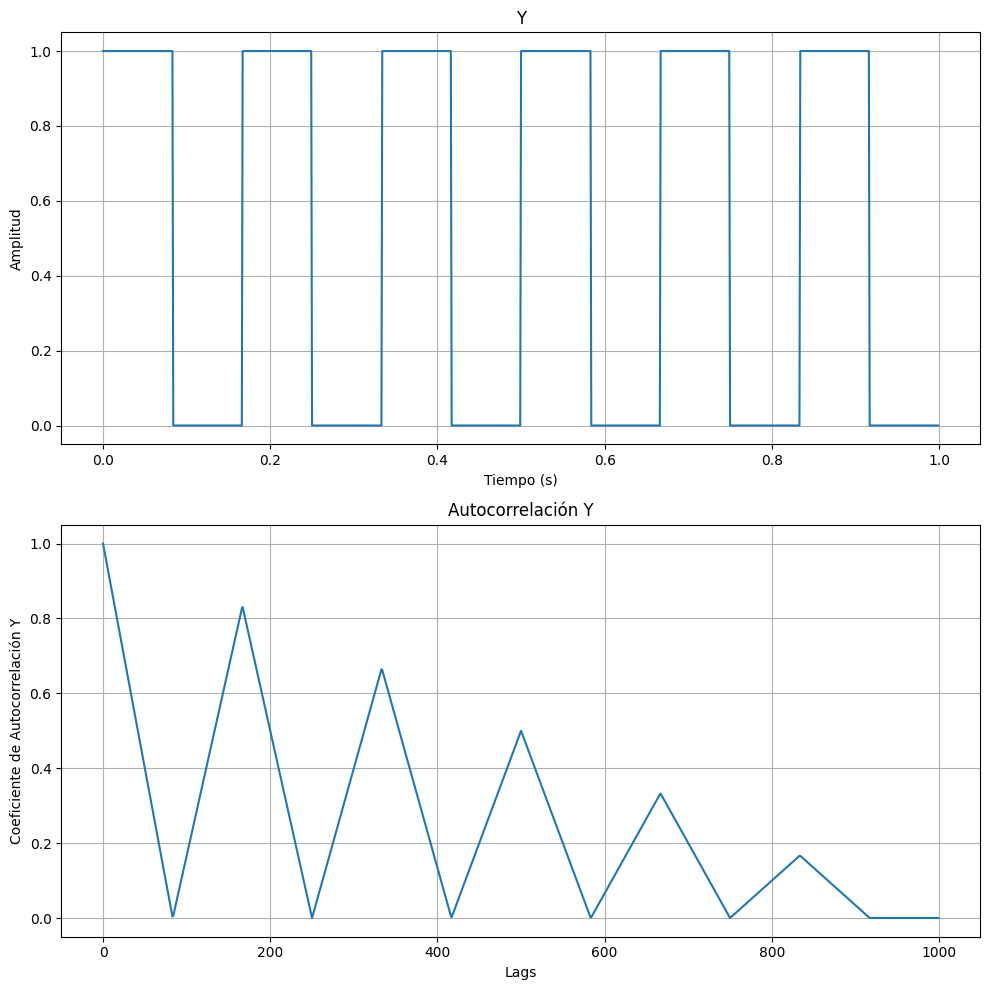

In [ ]:
from scipy.signal import square

# Crear la señal Y
f_Y = 6 # Frecuencia en Hz
Y = 0.5 + 0.5 * square(2 * np.pi * f_Y * t , 0.5)  # Onda cuadrada

# Calcular la autocorrelación de Y
autocorr_Y = np.correlate(Y , Y, mode='full')
autocorr_Y /= np.max(autocorr_Y)  # Normalizar
lags_Y = np.arange(-len(Y) + 1, len(Y))

# Graficar la señal Y y su autocorrelación
plt.figure(figsize=(10, 10))

# Subgráfico 1: Señal Y
plt.subplot(2, 1, 1)
plt.plot(t, Y)
plt.title('Y')
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Subgráfico 2: Autocorrelación de Y
plt.subplot(2, 1, 2)
plt.plot(lags_Y[int(N-1):int(2*N)], autocorr_Y[int(N-1):int(2*N)])
#plt.plot(lags_Y[int(N/2) : int(3*N/2)], autocorr_Y)
plt.title('Autocorrelación Y')
plt.grid()
plt.xlabel('Lags')
plt.ylabel('Coeficiente de Autocorrelación Y')

plt.tight_layout()
plt.show()

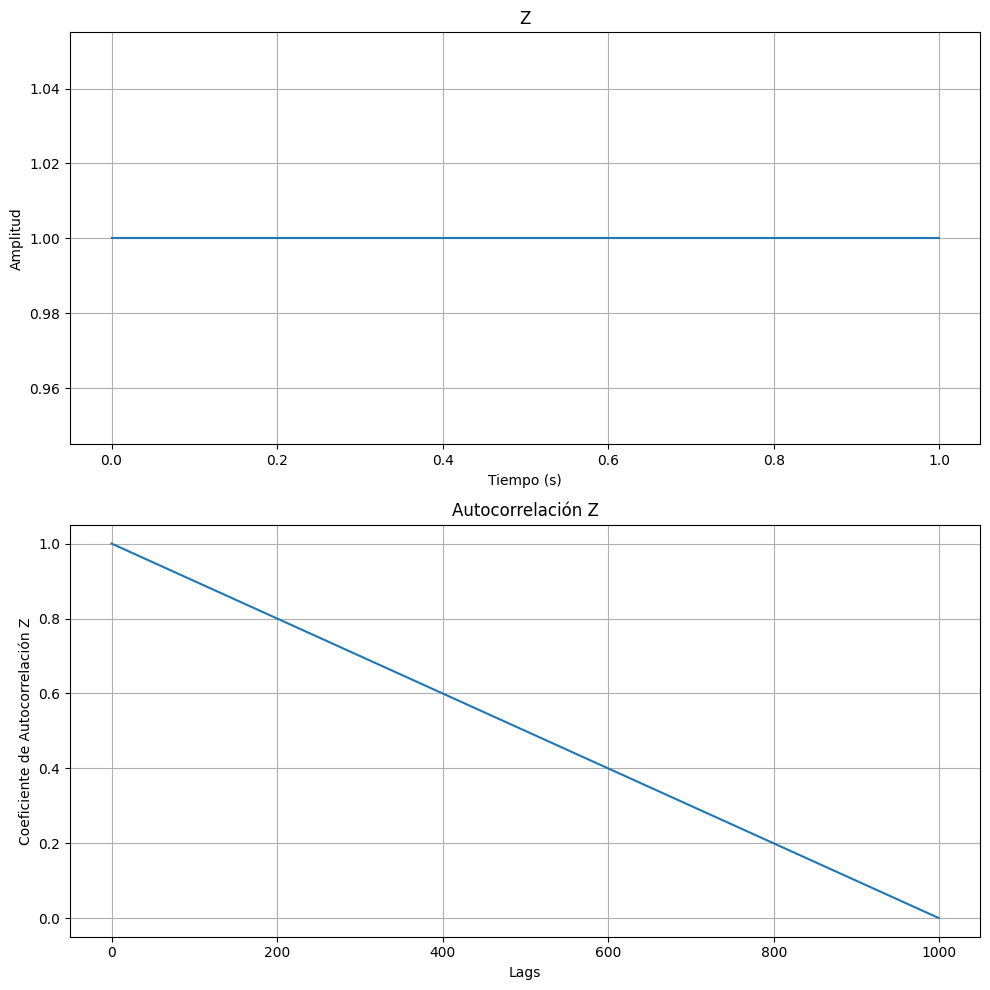

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal # Import scipy

# Crear la señal Z
Z = 1 * np.ones_like(t)  # Señal constante

# Calcular la autocorrelación de Z
autocorr_Z = signal.correlate(Z, Z, mode='full', method='auto') # Use signal.correlate
#autocorr_Z = np.correlate(Z, Z, mode='full')
autocorr_Z /= np.max(autocorr_Z)  # Normalizar
lags_Z = np.arange(-len(Z) + 1, len(Z))

# Graficar la señal Z y su autocorrelación
plt.figure(figsize=(10, 10))

# Subgráfico 1: Señal Z
plt.subplot(2, 1, 1)
plt.plot(t, Z)
plt.title('Z')
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Subgráfico 2: Autocorrelación de Z
plt.subplot(2, 1, 2)
plt.plot(lags_Z[int(N-1):int(2*N)], autocorr_Z[int(N-1):int(2*N)])
plt.title('Autocorrelación Z')
plt.grid()
plt.xlabel('Lags')
plt.ylabel('Coeficiente de Autocorrelación Z')

plt.tight_layout()
plt.show()

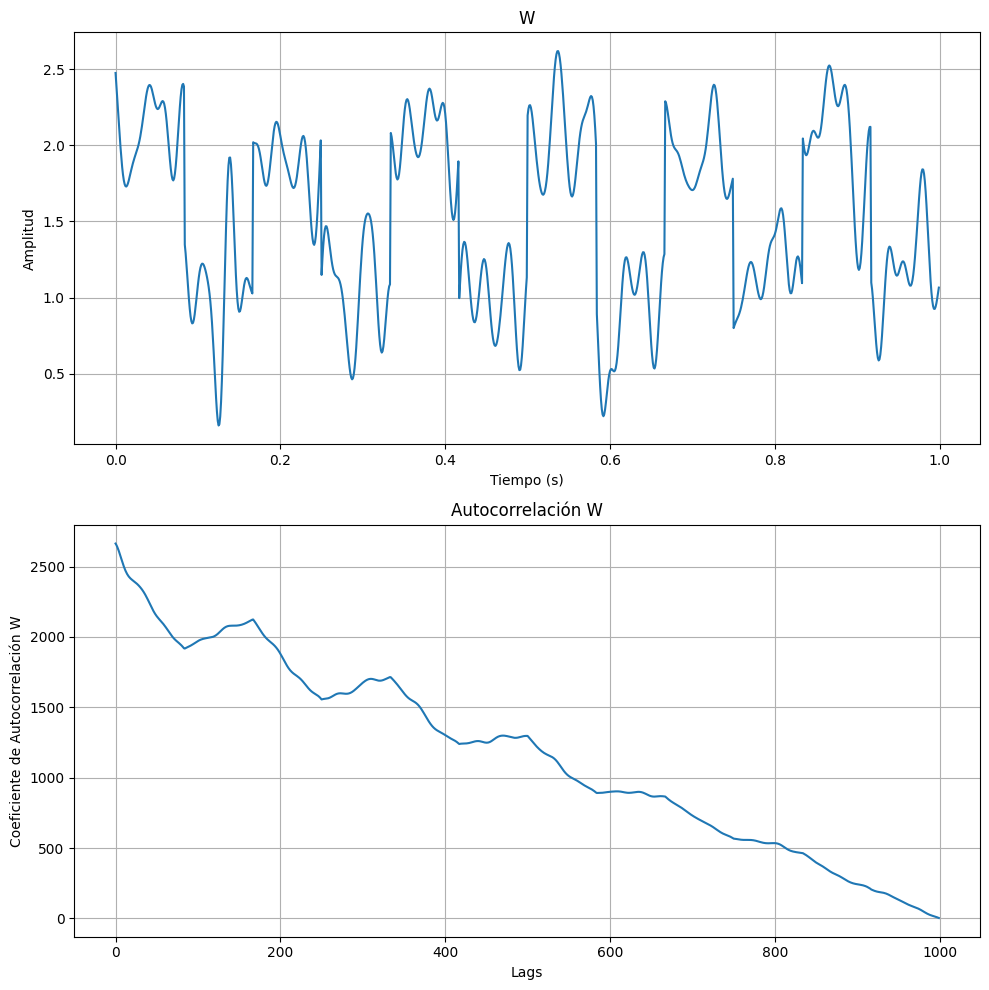

In [ ]:
# Crear la señal W como suma de X, Y y Z
W = X + Y + Z

# Calcular la autocorrelación de W
autocorr_W = np.correlate(W , W , mode='full')
#autocorr_W /= np.max(autocorr_W)  # Normalizar
lags_W = np.arange(-len(W) + 1, len(W))

# Graficar la señal W y su autocorrelación
plt.figure(figsize=(10, 10))

# Subgráfico 1: Señal W
plt.subplot(2, 1, 1)
plt.plot(t, W)
plt.title('W')
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Subgráfico 2: Autocorrelación de W
plt.subplot(2, 1, 2)
plt.plot(lags_W[int(N-1):int(2*N)], autocorr_W[int(N-1):int(2*N)])
plt.title('Autocorrelación W')
plt.grid()
plt.xlabel('Lags')
plt.ylabel('Coeficiente de Autocorrelación W')

plt.tight_layout()
plt.show()

## Problema N° 2:
Calcular y graficar la función de autocorrelación de la siguiente señal temporal:
x(t)=Asen(wot-sigma)

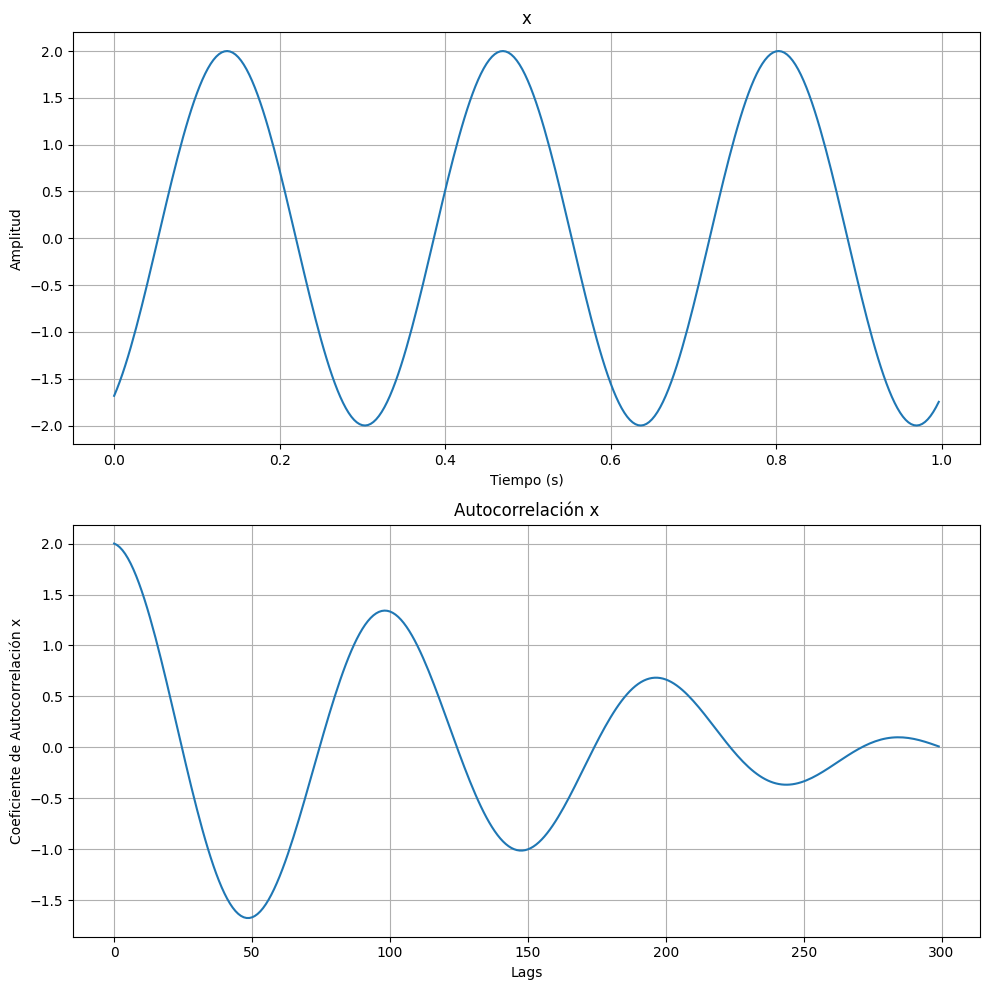

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Parámetros
f = 3  # Frecuencia en Hz
fs = 100 * f  # Frecuencia de muestreo en Hz
t = np.arange(0, 1, 1/fs)  # Vector de tiempo [seg]
N = len(t)
A = 2  # Amplitud
sigma = 1  # Fase
wo = 2 * np.pi * f  # Frecuencia angular

# Señal x
x = A * np.sin(wo * t - sigma)  # Señal senoidal

# Calcular la autocorrelación x
autocorr_x = correlate(x, x, mode='full', method='auto') /N
lags_x = np.arange(-N + 1, N)  # Lags

# Graficar la señal x y su autocorrelación
plt.figure(figsize=(10, 10))

# Señal x
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('x')
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Autocorrelación
plt.subplot(2, 1, 2)
plt.plot(lags_x[N-1:], autocorr_x[N-1:])  # Ajustar lags para la gráfica
plt.title('Autocorrelación x')
plt.grid(True)
plt.xlabel('Lags')
plt.ylabel('Coeficiente de Autocorrelación x')

plt.tight_layout()
plt.show()

## Problema N°3

<ipython-input-19-007f2fdc29c5>:60: ComplexWarning: Casting complex values to real discards the imaginary part
  c[n] = (A / 2) * F[n] / np.max(np.abs(F))


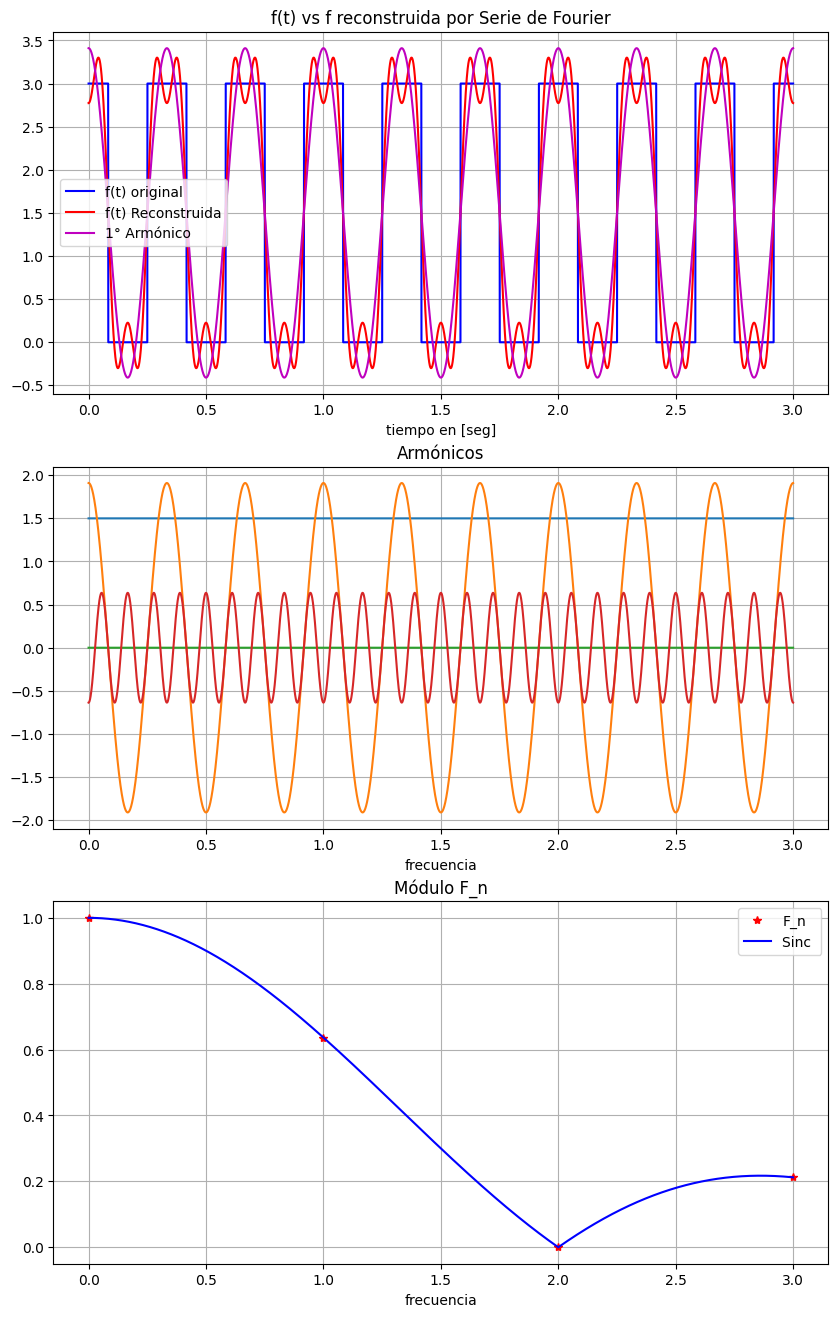

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
f = 3  # frecuencia de la señal
fs = 1000 * f  # frecuencia de muestreo
t_F = 3  # tiempo final en [seg]
t = np.arange(0, t_F, 1/fs)  # Vector de tiempo [seg]
A = 3  # Amplitud
T = 1 / f  # Periodo
d = 0.5*T  # desplazamiento


# Señal f
f_t = (A / 2) + (A / 2) * np.sign(np.sin(2 * np.pi * f * (t + (d / 2))))

# Gráfico de la señal original
plt.figure(figsize=(10, 16))
plt.figure(1)
plt.subplot(3, 1, 1)
plt.plot(t, f_t.real, 'b', label='f(t) original')
plt.title('f(t) vs f reconstruida por Serie de Fourier')
plt.xlabel('tiempo en [seg]')
plt.grid()
#plt.hold(True)

# Espectro de Fourier
t_1 = 0
t_2 = T
t_aux = np.arange(t_1, t_2, 1/fs)
w0 = 2 * np.pi / T
N = 3  # Números de armónicos
F = np.zeros(N + 1, dtype=complex)
vector_frecuencia = np.arange(N + 1)

for n in range(N + 1):
    for i in range(len(t_aux)):
        F[n] += f_t[i] * np.exp(-n * w0 * 1j * t[i])

modudo_Fn = np.abs(F) / np.max(np.abs(F))
f_aux = np.arange(0, N, 1/fs)
Sinc_f = np.abs(np.sinc(d*f*f_aux)) ##comparar

# Gráfico Módulo de F
plt.figure(1)
plt.subplot(3, 1, 3)
plt.plot(vector_frecuencia, modudo_Fn, '*r', label='F_n')
plt.plot(f_aux,Sinc_f, '-b', label='Sinc ')
plt.title('Módulo F_n')
plt.xlabel('frecuencia')
plt.grid()
plt.legend()

# Serie de Fourier
f_t_F = np.zeros((N + 1, len(t)), dtype=complex)  # armónicos
f_t_rec = np.zeros(len(t), dtype=complex)  # f(t) reconstruida
c = np.zeros(N + 1)

for n in range(N + 1):
    c[n] = (A / 2) * F[n] / np.max(np.abs(F))
    f_t_F[n, :] = 2 * c[n] * (np.cos(n * w0 * t) + 1j * np.sin(n * w0 * t))

f_t_F[0, :] /= 2
for n in range(N + 1):
    f_t_rec += f_t_F[n, :]

# Gráfico de armónicos
plt.figure(1)
plt.subplot(3, 1, 2)
for j in range(N + 1):
    plt.plot(t, f_t_F[j, :])
plt.title('Armónicos')
plt.xlabel('frecuencia')
plt.grid()

# Gráfico de la señal reconstruida
plt.figure(1)
plt.subplot(3, 1, 1)
plt.plot(t, f_t_rec.real, 'r', label='f(t) Reconstruida')
plt.plot(t, c[0] + f_t_F[1, :].real, 'm', label='1° Armónico')
plt.legend()
plt.show()

## Problema N°4

/usr/local/lib/python3.11/dist-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


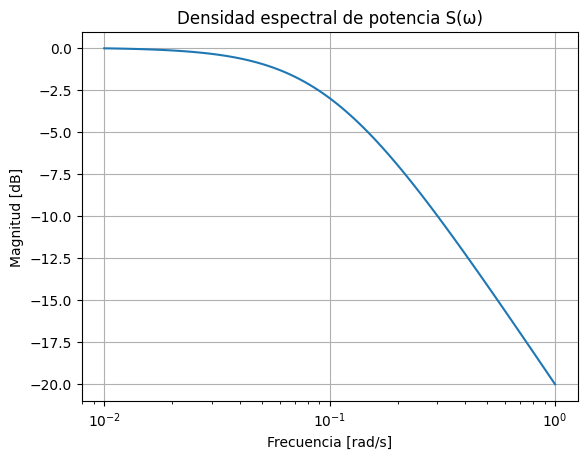

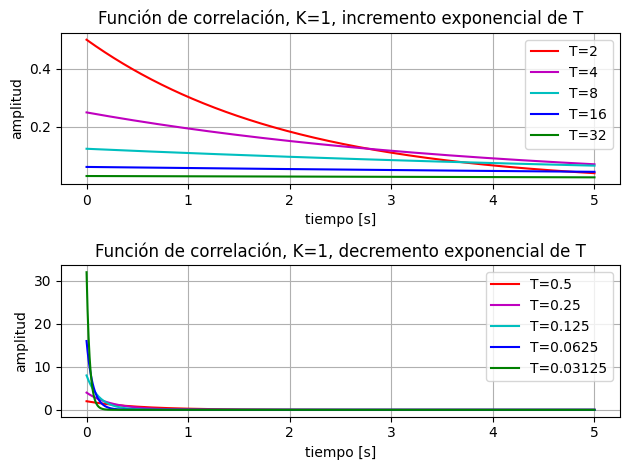

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, bode

# Densidad espectral de potencia
K = 1
T = 10
Fw = TransferFunction([0, K], [T, 1])  # Transformada de Fourier

# Gráfico de Bode
plt.figure(1)
w, mag, phase = bode(Fw)
plt.semilogx(w, mag)
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Magnitud [dB]')
plt.title('Densidad espectral de potencia S(ω)')
plt.grid()

# Función de correlación
t = np.arange(0, 5.01, 0.01)  # vector tiempo
phi_xx = K / T * np.exp(-t / T)

# Analizar la influencia de T en la función de correlación
M = 5
plt.figure(2)

# Incremento exponencial de T
plt.subplot(2, 1, 1)
plt.title('Función de correlación, K=1, incremento exponencial de T')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud')
colors = ['r', 'm', 'c', 'b', 'g']
for i in range(M):
    T = 2 ** (i + 1)
    plt.plot(t, K / T * np.exp(-t / T), color=colors[i])
plt.grid()
plt.legend([f'T={2**i}' for i in range(1, M + 1)])

# Decremento exponencial de T
plt.subplot(2, 1, 2)
plt.title('Función de correlación, K=1, decremento exponencial de T')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud')
for i in range(M):
    T = 2 ** (-i - 1)
    plt.plot(t, K / T * np.exp(-t / T), color=colors[i])
plt.grid()
plt.legend([f'T={2**(-i)}' for i in range(1, M + 1)])

plt.tight_layout()
plt.show()

## Problema N°5

<ipython-input-62-c14d44264898>:44: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-fs/2, fs/2])


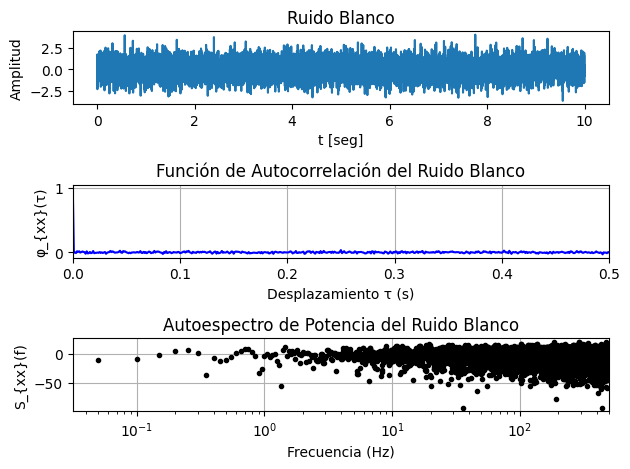

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generación de ruido blanco
fs = 1000
t_max = 10
sigma = 1
t = np.arange(0, t_max, 1/fs)
N = len(t)
np.random.seed(1)
x = sigma * np.random.randn(N)

# Gráfico del ruido blanco
plt.figure(1)

# Ruido Blanco
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Ruido Blanco')
plt.xlabel('t [seg]')
plt.ylabel('Amplitud')

# Autocorrelación
phi_xx = np.correlate(x, x, mode='full') / N
lags = np.arange(-N + 1, N)
tau = lags / fs
plt.subplot(3, 1, 2)
plt.plot(tau, phi_xx, 'b-')
plt.xlabel('Desplazamiento τ (s)')
plt.ylabel('φ_{xx}(τ)')
plt.title('Función de Autocorrelación del Ruido Blanco')
plt.grid()
plt.xlim([0, 0.5])

# Autoespectro de Potencia
S_xx = np.fft.fft(phi_xx)
f = np.fft.fftshift(np.fft.fftfreq(len(S_xx), d=1/fs))
plt.subplot(3, 1, 3)
plt.semilogx(f[N//2:], 20 * np.log10(np.abs(S_xx[N//2:])), '.k')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('S_{xx}(f)')
plt.title('Autoespectro de Potencia del Ruido Blanco')
plt.grid()
plt.xlim([-fs/2, fs/2])

plt.tight_layout()
plt.show()

## Problema N°6

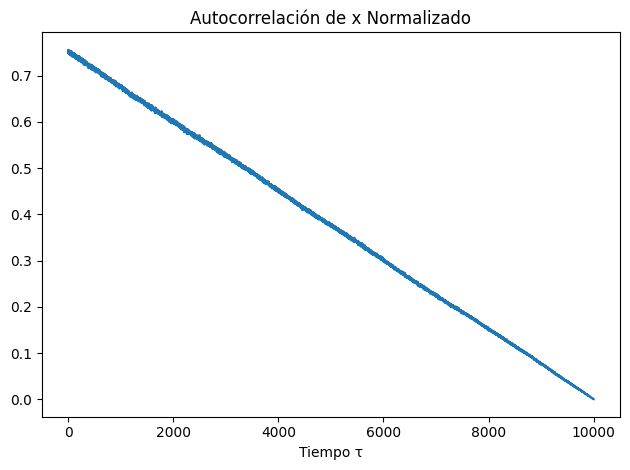

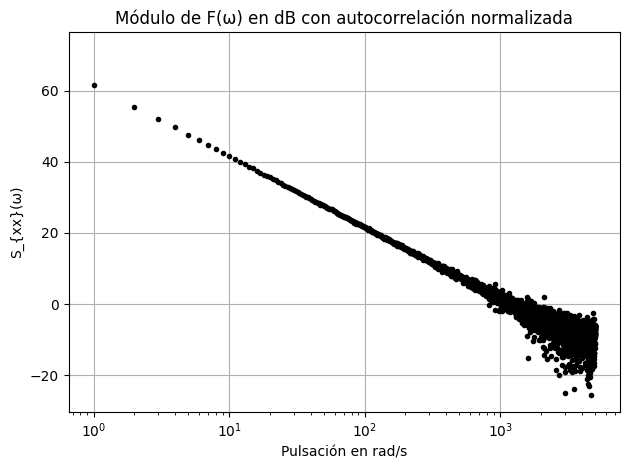

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Señal: secuencia numérica pseudoaleatoria de 1000000 datos en el intervalo [0,1)
N = 10000
x = 0
xv = np.zeros(N)

for hh in range(N):
    x = ((np.pi + x) ** 5) - np.floor((np.pi + x) ** 5)
    xv[hh] = x

# Autocorrelación de la señal
fixx_nor = np.correlate(xv, xv, mode='full') / np.max(np.correlate(xv, xv, mode='full'))  # normalizada

# Gráfico de autocorrelación
plt.figure(1)
plt.plot(fixx_nor[N:2*N-1])
plt.title('Autocorrelación de x Normalizado')
plt.xlabel('Tiempo τ')

plt.tight_layout()
plt.show()

# Espectro de potencia Sxx
SxM_nor = np.fft.fft(fixx_nor[N:2*N-1])

plt.figure(2)
plt.semilogx(20 * np.log10(np.abs(SxM_nor[:N//2])), '.k')
plt.title('Módulo de F(ω) en dB con autocorrelación normalizada')
plt.grid()
plt.xlabel('Pulsación en rad/s')
plt.ylabel('S_{xx}(ω)')

plt.tight_layout()
plt.show()

## Problema N°7

In [ ]:
!pip install SciencePlots # !pip install git+https://github.com/garrettj403/SciencePlots

In [ ]:
import scienceplots

In [ ]:
!pip install -U control qtpy;

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 6.9 MB/s eta 0:00:00


In [ ]:
import control as ctrl
from control.matlab import *

In [ ]:
import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from scipy.signal import correlate

In [ ]:
# Parámetros iniciales
At = 1/250  # Tasa de muestreo
fs = 1/At   # Frecuencia de muestreo
m = 8       # Orden de la PRBS
N = 5000    # Puntos para muestrear
el = 5      # Longitud de cada bloque
# Condiciones iniciales
x = np.ones(m)  # Registro inicial
y = np.zeros(N)  # Salida PRBS
# Generación de la PRBS
for k in range(0, N, el):
    if m == 6:
        Rec = np.logical_xor(x[5], x[4]).astype(int)  # PRBS 6: x^6 + x^5 + 1
    elif m == 7:
        Rec = np.logical_xor(x[6], x[5]).astype(int)  # PRBS 7: x^7 + x^6 + 1
    elif m == 8:
        Rec = np.logical_xor(np.logical_xor(x[7], x[5]), np.logical_xor(x[3], x[4])).astype(int)  # PRBS 8: x^8 + x^6 + x^5 + x^4 + 1
    elif m == 9:
        Rec = np.logical_xor(x[8], x[4]).astype(int)  # PRBS 9: x^9 + x^5 + 1
    elif m == 10:
        Rec = np.logical_xor(x[9], x[6]).astype(int)  # PRBS # x^10 + x^7 + 1
    elif m == 11:
        Rec = np.logical_xor(x[10], x[8]).astype(int)  # PRBS 11: x^11 + x^9 + 1
    elif m == 15:
        Rec = np.logical_xor(x[14], x[13]).astype(int)  # PRBS 15: x^15 + x^14 + 1
    elif m == 20:
        Rec = np.logical_xor(x[19], x[2]).astype(int)  # PRBS 20: x^20 + x^3 + 1
    else:
        Rec = np.logical_xor(x[5], x[4]).astype(int)  # Por defecto PRBS 6
    # Desplazar registro
    x[1:m] = x[0:m-1]
    x[0] = Rec
    # Generar salida bipolar (-1, 1)
    y[k:min(k+el, N)] = 2 * x[m-1] - 1
# Copiar la señal generada
x = y

### Cálculo de la autocorrelación

In [ ]:
N = len(x) # Cálculo de la autocorrelación
Tmax = N * At
t = np.arange(At, Tmax + At, At)
fixx = np.zeros(N)
fixx[0] = np.dot(x, x) / N
for j in range(1, N):
    for ii in range(N - j):
        fixx[j] += x[ii] * x[ii + j]
    fixx[j] /= (N - j)
# Autocorrelación usando scipy (para comparación, no usada en gráficos)
fixxM = correlate(x, x, mode='full')
# Cálculo de la densidad espectral de potencia
M1 = int(0.99 * N)  # Intervalos de correlación útiles
j1 = np.arange(M1)
Sx = np.zeros(M1 + 1, dtype=complex)
for k in range(M1 + 1):
    argu = -1j * 2 * np.pi * k * j1 / M1
    Sx[k] = np.dot(fixx[:M1], np.exp(argu))
Sx = Sx / M1
Af = 2 * fs / 2 / M1
w0 = 2 * np.pi * np.arange(Af, fs/2 + Af, Af)

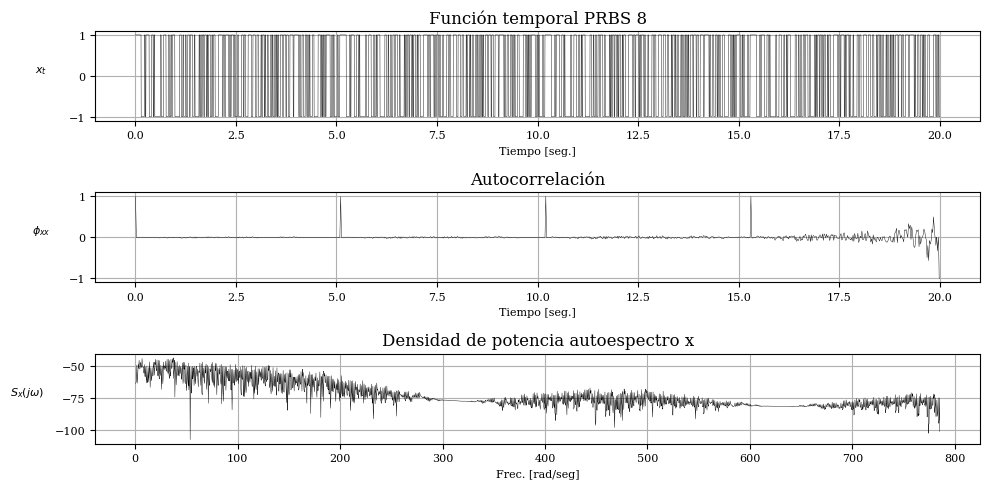

In [ ]:
with plt.style.context('ieee'):
# with plt.style.context('no-latex','science'):
# with plt.style.context('dark_background'):
  fig, axs = plt.subplots(3, 1, figsize=(10, 5), dpi=100) # Changed to 2 rows, 1 column
axs[0].plot(t, x, 'k' ,linewidth=.3) # Señal temporal
axs[0].set_title(f'Función temporal PRBS {m}')
axs[0].set_xlabel('Tiempo [seg.]')
axs[0].set_ylabel('$x_t$', rotation=0, labelpad=20)
axs[0].grid(True)
axs[1].plot(t, fixx[:N],linewidth=.3) # Autocorrelación
axs[1].set_title('Autocorrelación')
axs[1].set_xlabel('Tiempo [seg.]')
axs[1].set_ylabel('$\phi_{xx}$', rotation=0, labelpad=20)
axs[1].grid(True)
axs[2].plot(w0[:M1//2], 20 * np.log10(np.abs(Sx[:M1//2])), 'k',linewidth=.3) # Densidad espectral de potencia
axs[2].set_title('Densidad de potencia autoespectro x')
axs[2].set_xlabel('Frec. [rad/seg]')
axs[2].set_ylabel('$S_x(j\omega)$', rotation=0, labelpad=20)
axs[2].grid(True)
plt.tight_layout() #Se leen correctamente las letras